# Exercise 1 :<br>Linear Regression with Multiple Variables 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Load data

In [7]:
data = pd.read_csv("ex1data2.txt", header=None, names=["size", "bedrooms", "price"])

In [8]:
data

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [38]:
X = np.array( data.ix[:, 0:2] )
y = np.array( data.ix[:,2] )
m = len(y)

## Feature Normalization

In [66]:
def featureNormalize(feat):
    feat_norm = feat.copy()
    mu = np.mean(feat_norm, axis=0)
    sigma = np.std(feat_norm, axis=0)
    
    feat_norm = (feat_norm - mu)/sigma
    
    return [feat_norm, mu, sigma]

In [67]:
X_norm, mu, sigma = featureNormalize(X)

In [70]:
pd.DataFrame(X_norm).describe()

,0,1
count,4.700000e+01,4.700000e+01
mean,9.448707e-18,2.433042e-16
std,1.010811e+00,1.010811e+00
min,-1.461049e+00,-2.882690e+00
25%,-7.233261e-01,-2.260934e-01
50%,-1.433229e-01,-2.260934e-01
75%,3.412850e-01,1.102205e+00
max,3.150993e+00,2.430504e+00


In [99]:
X = np.append( np.ones((len(X_norm), 1)), X_norm, 1)

In [100]:
pd.DataFrame(X)

,0,1,2
0,1.0,0.131415,-0.226093
1,1.0,-0.509641,-0.226093
2,1.0,0.507909,-0.226093
3,1.0,-0.743677,-1.554392
4,1.0,1.271071,1.102205
5,1.0,-0.019945,1.102205
6,1.0,-0.593589,-0.226093
7,1.0,-0.729686,-0.226093
8,1.0,-0.789467,-0.226093
9,1.0,-0.644466,-0.226093


## Cost Function

In [114]:
def costFunction(X, y, theta):
    m = len(y)
    J = np.sum( (X.dot(theta) - y)**2 ) / (2*m)
    return J

## Gradient Descent

In [107]:
alpha = 0.1
num_iters = 400
theta = np.zeros(3)

In [116]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    J_history = np.array([])
    for i in range(num_iters):
        theta = theta - alpha * (1/m) * (X.dot(theta) - y).dot(X)
        J_history = np.append(J_history, costFunction(X, y, theta))
    
    return [theta, J_history]

In [117]:
thetaOpt, J_history = gradientDescent(X, y, theta, alpha, num_iters)

### theta computed from gradient descent

In [118]:
thetaOpt

array([ 340412.65957447,  109447.79558639,   -6578.3539709 ])

### Plot the convergence graph

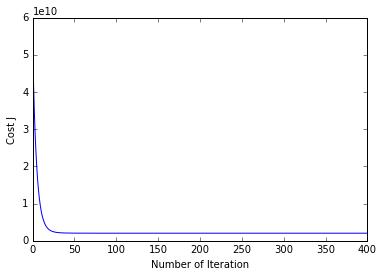

In [121]:
plt.plot(J_history)
plt.xlabel("Number of Iteration")
plt.ylabel("Cost J")
plt.show()

### Estimate the price of a 1650 sq-ft, 3 bedrooms house

In [123]:
exFeature = np.append( 1, np.array(([1650, 3] - mu)/ sigma))
price = exFeature.dot(thetaOpt) 

In [124]:
price

293081.46452916862

## Normal Equations

In [137]:
def normalEqn(X, y):
    
    theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    return theta

In [139]:
thetaNEOpt = normalEqn(X, y)

### theta computed from the normal equations

In [142]:
thetaNEOpt

array([ 340412.65957447,  109447.79646964,   -6578.35485416])

### Estimate the price of a 1650 sq-ft, 3 bedrooms house

In [143]:
exFeature = np.append( 1, np.array(([1650, 3] - mu)/ sigma))
price = exFeature.dot(thetaNEOpt) 

In [144]:
price

293081.46433489613